#                                 INTRODUÇÃO À LINGUAGENS ESTATÍSCIAS

##                                                 CIÊNCIA DE DADOS E BIG DATA

Nome: Emanuel Lucas Nunes de Carvalho, Matricula: 90581
Unidade: Praça Liberdade
emanuellndc@gmail.com

## INTRODUÇÃO

Atualmente conhecer o perfil dos funcionários da empresa é de extrema importancia para o RH. Conhecer as habilidades, formação dos funcinários é funcamental para o sucesso do negócio da empresa. 
 

## PROBLEMA


Aquiles da Trojan Technologies S.A quer realizar contratações feitas por sua empresa de forma  homogêneo de funcionários. O objetivo do trabalho é realizar análises da base de dados da empresa, ajudando Aquiles a entender melhor as caracteristicas em idiomas, habilidades, formações e experiências dos seus  funcionários. 


## IMPLEMENTAÇÃO

 - Foi criado um método para leitura dos arquivos CSV 
 - Limpeza dos dados
 - Consolidação dos dados
 - Geração dos gráficos
 

In [347]:
# importando as bibliotecas para realizar as análise dos dados

In [1]:
import pandas as pd 
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from plotnine import *


C:\Users\Emanuel Carvalho\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# DEF para ler os dados de cada arquivo e retorna um datafreme em pandas

In [43]:
def leitura_dados(caminho):
    df = pd.read_csv(caminho)
    return df

In [60]:
# realizando a leitura de todos os arquivos chamando o metodo de ler os arquivos
df_formacao = leitura_dados('formacao.csv')
df_linguas = leitura_dados('linguas.csv')
df_experiencia = leitura_dados('experiencia_trabalho.csv')
df_habilidades = leitura_dados('habilidades.csv')
df_perfil = leitura_dados('perfil.csv')

In [61]:
df_linguas.isnull().sum()

    

name            0
proficiency    23
perfil_id       0
dtype: int64

In [62]:
#Buscando as experiências de cada id dentro da empresa Trojan 
df_funcionarios = df_experiencia[df_experiencia['company']=='Trojan Technologies']
# Realizando o split para pegar a palavra que está depois do -
df_funcionarios_data_atual = df_funcionarios.date.str.split('–').str[1].astype(str)
# Buscando todos as linhas que representam a atual função do funcionário na empresa - o momento 
df_trabalho_atual_funcionario = df_funcionarios[df_funcionarios_data_atual.str[1] == 'o']
# criando um Df com a atual função do funcionário na empresa e seu Id- Utilizado para cruzar com os dados estatisticos.
posicao_atual_id = df_trabalho_atual_funcionario[['position','perfil_id']]

In [63]:
#limpando os nulos
df_linguas = df_linguas[df_linguas['proficiency'].notnull()]
df_experiencia.dropna(axis= 0, thresh=3,inplace = True)
df_habilidades.dropna(axis= 0, thresh=3,inplace = True)
df_formacao.dropna(axis= 0, thresh=5,inplace = True)


In [64]:
# limpando o /n das colunas degree e name
df_formacao['degree'] = df_formacao['degree'].str.split('\n',1).str[1]
df_linguas['name'] = df_linguas['name'].str.split('\n',1).str[1]

In [65]:
# renomeando as linhas do nome dos idiomas falados, do sexo e da Universidade Feral de Minas Gerais.

df_perfil.loc[df_perfil['gender'] == 'NA', 'gender'] ='Não definido'
df_formacao.loc[df_formacao['school'] == 'UFMG - Universidade Federal de Minas Gerais', 'school'] ='Universidade Federal de Minas Gerais'
df_linguas.loc[df_linguas['name'] == 'Portuguese', 'name'] ='Português'
df_linguas.loc[df_linguas['name'] == 'Spanish', 'name'] ='Espanhol'
df_linguas.loc[df_linguas['name'] == 'English', 'name'] ='Inglês'
df_linguas.loc[df_linguas['name'] == 'Inglês - Intermediário - em curso', 'name'] ='Inglês'
df_linguas.loc[df_linguas['name'] == 'Inglês - Certificação TOEIC', 'name'] ='Inglês'
df_linguas.loc[df_linguas['name'] == 'Portugais', 'name'] ='Português'
df_linguas.loc[df_linguas['name'] == 'Italian', 'name'] ='Italiano'
df_linguas.loc[df_linguas['name'] == 'French', 'name'] ='Francês'
df_linguas.loc[df_linguas['name'] == 'Français', 'name'] ='Francês'
df_linguas.loc[df_linguas['name'] == 'Inglês médio (1100-1500)', 'name'] ='Inglês'



In [66]:
df_linguas

,name,proficiency,perfil_id
0,Espanhol,Nível avançado,0
1,Inglês,Fluente ou nativo,0
2,Português,Fluente ou nativo,0
5,Inglês,Nível avançado,2
6,Português,Fluente ou nativo,2
7,Espanhol,Nível básico a intermediário,3
8,Inglês,Nível avançado,3
9,Português,Fluente ou nativo,3
10,Inglês,Fluente ou nativo,4
11,Português,Fluente ou nativo,4


In [67]:
# consolidando a quantidade de informações para cada funcionário.
# consolidando a quantidade de experiencias por funcionário.
Quantidade_Experiencias = df_experiencia.groupby('perfil_id').agg({'company': np.size}).reset_index()
#consolidando a quantidade de idiosmas por cada funcionário
Quantidade_Idiomas =df_linguas.groupby('perfil_id').agg({'name': np.size}).reset_index()
#consolidando a quantidade de habilidades por cada funcionário
Quantidade_Habilidades = df_habilidades.groupby('perfil_id').agg({'name': np.size}).reset_index()
#consolidando a quantidade de formação por cada funcionários.
Quantidade_educacao = df_formacao.groupby('perfil_id').agg({'degree': np.size}).reset_index()



In [68]:
#renomeando o nome das colunas 
Quantidade_Experiencias.columns = ['perfil_id','Experiência']
Quantidade_Idiomas.columns = ['perfil_id','Idiomas']
Quantidade_Habilidades.columns = ['perfil_id','Habilidades']
Quantidade_educacao.columns = ['perfil_id','Formação']

In [69]:
#criando uma lista de df para juntar os df pelo perfil_id
dfs = [df_perfil,Quantidade_Experiencias, Quantidade_Idiomas, Quantidade_Habilidades, Quantidade_educacao, posicao_atual_id]


In [70]:
# Realizando o merge nos DataFrames pelo Id_Perfil.
df_final = reduce(lambda left,right: pd.merge(left,right,on='perfil_id'), dfs)

In [71]:
df_final

,perfil_id,gender,Experiência,Idiomas,Habilidades,Formação,position
0,0,MALE,5,3,33,1,CEO and Founder
1,2,MALE,5,2,43,2,Full Stack Developer
2,4,MALE,5,3,11,2,Sales Operations Coordinator
3,9,FEMALE,3,3,42,2,Sales Operations Manager
4,10,MALE,5,2,18,2,Head of In-Store Operation
5,12,MALE,5,3,10,1,Operações ERP
6,12,MALE,5,3,10,1,Time de Expansão
7,14,MALE,5,2,8,2,Product Manager
8,16,FEMALE,5,4,11,3,Head of People
9,17,FEMALE,3,3,12,2,Public Relations Intern


# Análise dos dados
-Criando duas tabelas ordenando as habilidades e experiência. Descobrimos que funcções como Gerente, Cordenadores, Diretores possuem  experiência e habilidades maiores que os outros funcionarios. position é a função atual do funcionário dentro da empresa

In [75]:
#Ordenando pelas maiores Experiências
df_final_ordenado_habilidade = df_final.sort_values(by = 'Experiência', ascending=False)
#Depois de ordenado escolhendo os 15 primeiros
df_final_ordenado_habilidade.head(15)

,perfil_id,gender,Experiência,Idiomas,Habilidades,Formação,position
0,0,MALE,5,3,33,1,CEO and Founder
23,40,MALE,5,1,17,2,Tech Leader
27,50,MALE,5,3,40,1,Director of Marketing
1,2,MALE,5,2,43,2,Full Stack Developer
30,57,FEMALE,5,1,21,1,Coordenadora de CS
31,60,MALE,5,3,47,2,Head of Data Analytics
33,63,MALE,5,2,23,3,Analista de tecnologia da informação
34,64,MALE,5,3,11,2,Analista Financeiro
37,66,MALE,5,2,42,2,Business Development Manager
39,72,MALE,5,2,21,2,Coordenador de marketing


In [76]:
#Ordenando pelas maiores Habilidades
df_final_ordenado_habilidade = df_final.sort_values(by = 'Habilidades', ascending=False)
df_final_ordenado_habilidade.head(15)

,perfil_id,gender,Experiência,Idiomas,Habilidades,Formação,position
28,52,MALE,5,3,50,2,Product Growth Manager
53,100,MALE,5,3,50,2,Coordenador Comercial
18,35,MALE,5,2,50,2,Engenheiro de software sênior
31,60,MALE,5,3,47,2,Head of Data Analytics
1,2,MALE,5,2,43,2,Full Stack Developer
3,9,FEMALE,3,3,42,2,Sales Operations Manager
37,66,MALE,5,2,42,2,Business Development Manager
27,50,MALE,5,3,40,1,Director of Marketing
25,44,MALE,5,3,39,1,Software Architect
14,24,MALE,3,3,35,3,Engenheiro de Software


In [77]:
#consolidando a quantidade de pessoas que falam cada idioma
Quantidade_pessoas_por_idiomas = df_linguas.groupby('name').agg({'perfil_id': np.size}).reset_index()
#consolidando a quantidade de pessoas por universidade
Quantidade_pessoaas_por_universidade = df_formacao.groupby('school').agg({'perfil_id': np.size}).reset_index()
#consolidando a quantidade de pessoas por sexo
Quantidade_pessoaas_por_sexo = df_perfil.groupby('gender').agg({'perfil_id': np.size}).reset_index()
#consolidando a porcentagem de pessoas por sexo
porcentagem_de_pessoas_por_sexo = Quantidade_pessoaas_por_sexo['perfil_id']/sum(Quantidade_pessoaas_por_sexo['perfil_id'])


# Análise dos dados

É possivel observar que 62% dos funcionários da empresa são do sexo masculino e 37 % do sexo feminino


In [78]:
porcentagem_de_pessoas_por_sexo

0    0.375
1    0.625
Name: perfil_id, dtype: float64


- Foi criado um 2 gráficos de idiomas, um para sexo masculino e outro para o sexo feminino.
 - Concluimos que os 3 principais idiomas entre o sexo masculino são: INGLÊS, PORTUGUÊS, ESPANHOL. 
 - O idioma Francês é o 4 colocado e predominante no sexo feminino.
 - Consolidação dos dados
 - Geração dos gráficos

C:\Users\Emanuel Carvalho\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\Emanuel Carvalho\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Emanuel Carvalho\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\Emanuel Carvalho\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


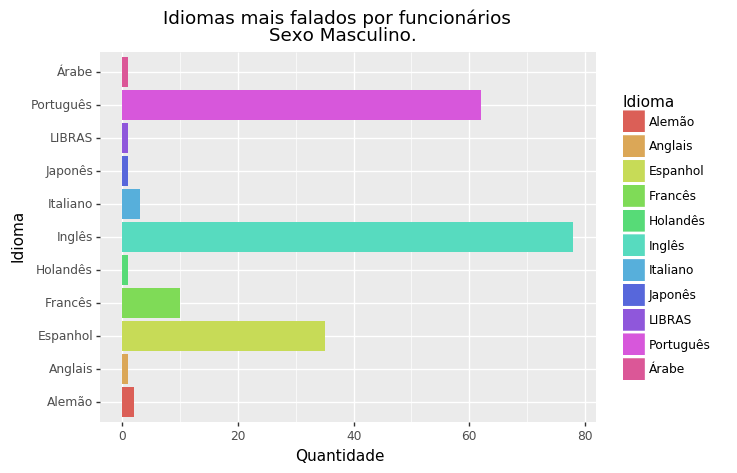

<ggplot: (-9223371902808578879)>

In [30]:
df_genero_idiomas = pd.merge(df_perfil, df_linguas, on='perfil_id')
quantidade_genero_idiomas = df_genero_idiomas.groupby(['name','gender']).size().reset_index()
quantidade_genero_idiomas[quantidade_genero_idiomas['gender'] =='MALE']     
quantidade_genero_idiomas.columns = ['Idioma','Gênero','Quantidade']
quantidade_genero_idiomas2 = quantidade_genero_idiomas.sort_values(by = 'Quantidade', ascending=False)

(ggplot(quantidade_genero_idiomas2.reset_index(), aes(x='Idioma', y='Quantidade', fill='Idioma'))
 + geom_bar(stat='identity')  + coord_flip() +     ggtitle("Idiomas mais falados por funcionários \n Sexo Masculino.")
) 


C:\Users\Emanuel Carvalho\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\Emanuel Carvalho\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Emanuel Carvalho\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\Emanuel Carvalho\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


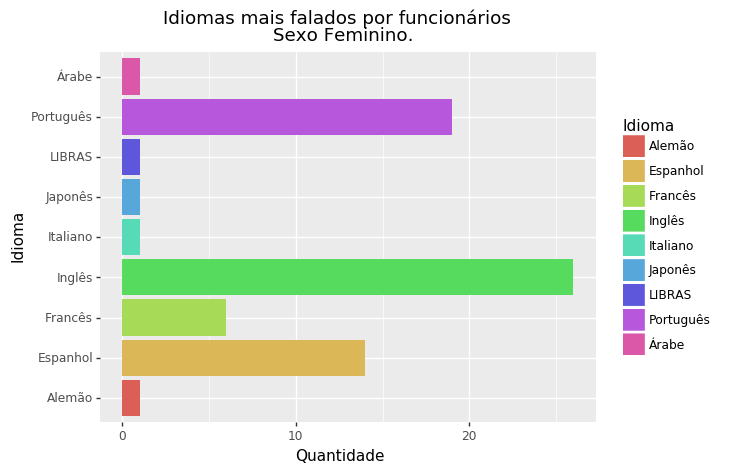

<ggplot: (134046245717)>

In [31]:
df_genero_idiomas_f = pd.merge(df_perfil, df_linguas, on='perfil_id')
quantidade_genero_idiomas_fem = df_genero_idiomas_f.groupby(['name','gender']).size().reset_index()
qt_idiomas_feminimo=quantidade_genero_idiomas_fem[quantidade_genero_idiomas_fem['gender'] =='FEMALE']  
qt_idiomas_feminimo
qt_idiomas_feminimo.columns = ['Idioma','Gênero','Quantidade']
qt_idiomas_feminimo

(ggplot(qt_idiomas_feminimo.reset_index(), aes(x='Idioma', y='Quantidade', fill='Idioma'))
 + geom_bar(stat='identity')  + coord_flip() +     ggtitle("Idiomas mais falados por funcionários \n Sexo Feminino.")
) 



Consolidando a quantidade de funcionários que fala cada idioma por proficiency. 14 pessoas falam o idioma inglês Nativamente e 35 são do nivel avançado. A empresa tem pelo menos 1 funcionário com o nível Fluente ou Avançado, exeto no idioma Árabe. A empresa tem um nível de idiomas relativamente bom caso seja nécessário atender clientes em diversos locais do mundo. 

In [35]:
df_linguas.groupby(['name','proficiency']).count()

perfil_id
name      proficiency                            
Alemão    Nível básico a intermediário          1
          Nível intermediário                   1
Anglais   Fluente ou nativo                     1
Espanhol  Nível avançado                        7
          Nível básico                         10
          Nível básico a intermediário         12
          Nível intermediário                   7
Francês   Fluente ou nativo                     1
          Nível básico                          2
          Nível básico a intermediário          5
          Nível intermediário                   3
Holandês  Nível básico                          1
Inglês    Fluente ou nativo                    14
          Nível avançado                       35
          Nível básico                          2
          Nível básico a intermediário          7
          Nível intermediário                  13
Italiano  Nível básico a intermediário          1
Japonês   Nível intermediário                   1
LIBRAS    Nível intermediário                   1
Português Fluente ou nativo                    62
Árabe     Nível básico                          1

Gráfico para realizar a regressão de experiência x Habilidade. Concluia-se que quanto maior o número de experiência, maior o número de habilidades.

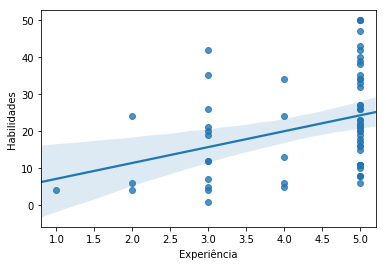

In [399]:
grafico_hab_exp = sns.regplot(x="Experiência", y="Habilidades", data = df_final);


Gráfico para realizar a regressão de Idiomas x Habilidade. Concluia-se que a pessoa passa maior parte do tempo estudando um idioma, acaba deixando aprender uma nova habilidade.

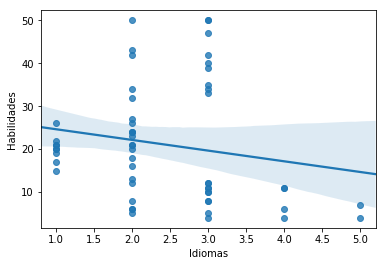

In [80]:
grafico_hab_exp = sns.regplot(x="Idiomas", y="Habilidades", data = df_final);


In [ ]:
Gráfico para realizar a regressão de Formação x Idiomas. Não existe muita relação do número de formação com o número de idiomas.

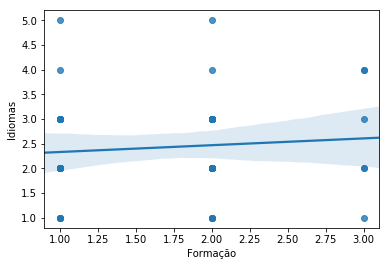

In [79]:
grafico_hab_exp = sns.regplot(x="Formação", y="Idiomas", data = df_final);


Gráfico para realizar a regressão de Formação x Habilidade. Não existe muita relação do número de formação com o número de Habilidades.

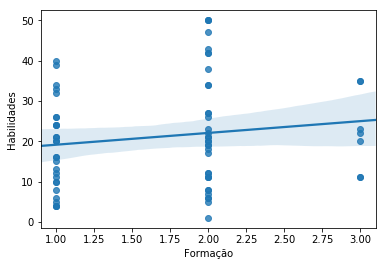

In [271]:
grafico_hab_exp = sns.regplot(x="Formação", y="Habilidades", data = df_final);


Foi realizado do contagem do número de funcionário por universidade e foi plotado um grafico para analisar os dados.
Foi ordenado e feito um TOP 5 unirsidades. O grafico foi utilizado a plotnine.
Foi necessário realizar a troca de nome ('UFMG - Universidade Federal de Minas Gerais) para (Universidade Federal de Minas Gerais). Linha de limpeza dos dados. Concluimos que a UFMG tem 27 funcinários, seguidos pela PUC e pelo Centro Universitário de Belo Horizonte.

C:\Users\Emanuel Carvalho\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\Emanuel Carvalho\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Emanuel Carvalho\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\Emanuel Carvalho\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


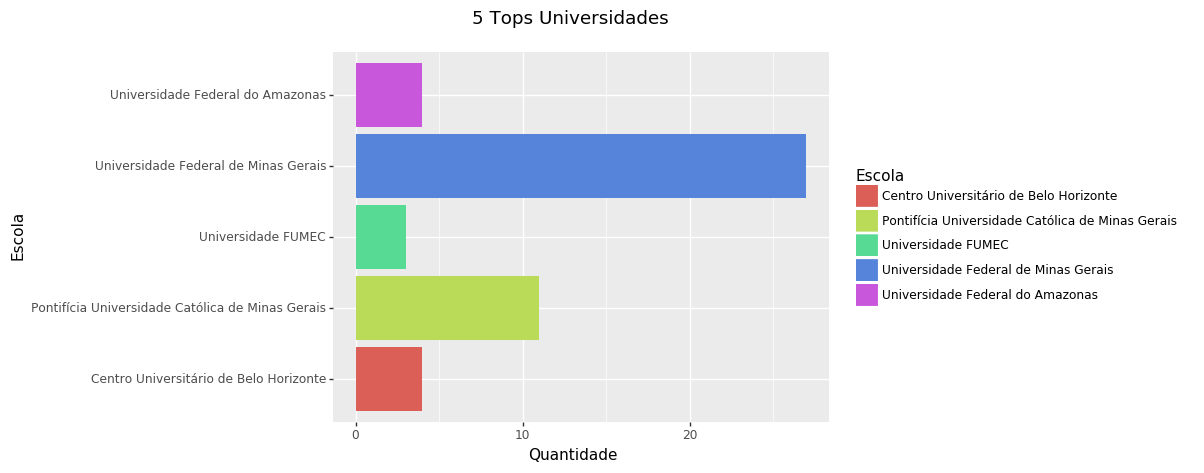

<ggplot: (-9223371930088846648)>

In [29]:
Quantidade_pessoaas_por_universidade = Quantidade_pessoaas_por_universidade.sort_values(by = 'perfil_id', ascending=False)
top_5universidades = Quantidade_pessoaas_por_universidade.head(5)
top_5universidades.columns = ['Escola','Quantidade']


(ggplot(top_5universidades.reset_index(), aes(x='Escola', y='Quantidade', fill='Escola'))
 + geom_bar(stat='identity')  + coord_flip() +     ggtitle("5 Tops Universidades \n")
) 

Visualização da dispersão dos dados entre cada coluna. As mulhres predominam com 4 e 5 idiomas. 

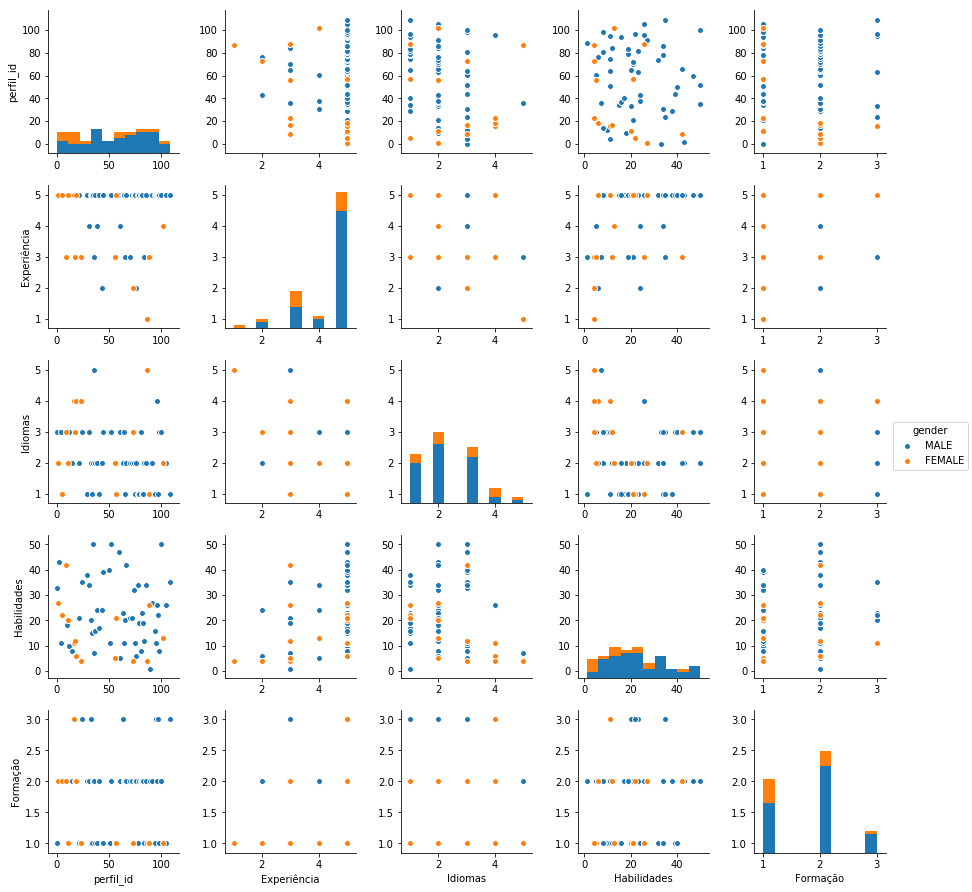

In [401]:
sns.pairplot(df_final, hue="gender")


Gráfico de violino para verificar a disperssão de Habilidades por sexo, realizando um coloração pelo idioma. As habilidades estão em maior parte entre 10 e 30 habilidades por funcinários. Uma pessoa do sexo feminino tem poucas habilidades, no entanto, tem tem a capacidade de conversar em 5 idiomas.
As habilidades dos sexo masculino é melhor distribuidas entre eles.

C:\Users\Emanuel Carvalho\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\Emanuel Carvalho\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Emanuel Carvalho\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\Emanuel Carvalho\Anaconda3\lib\site-packages\plotnine\stats\stat.py:242: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  stat

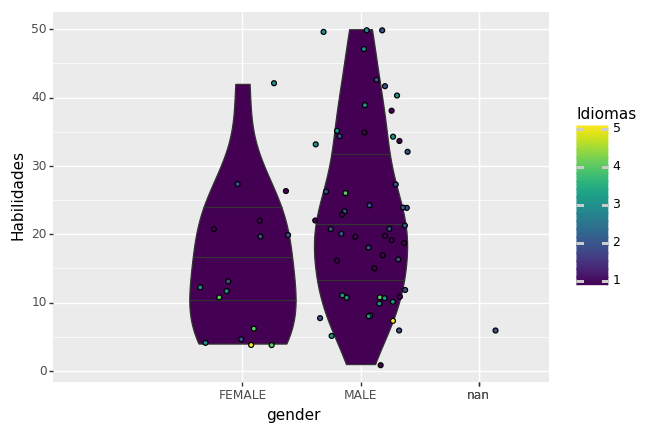

<ggplot: (131904721293)>

In [283]:
(ggplot(df_final, aes(x='gender',
                 y='Habilidades',
                 fill='Idiomas')) + 
geom_violin(draw_quantiles=(0.25, 0.5, 0.75)) + 
geom_jitter())

 # Resumo Estatístico  em geral
A média de idiomas falados entre os funcionários é de 2 idiomas. Ou seja, cada funcinário fala o seu idioma mais um. 
Em média cada funcionário tem 4 experiencias e 22 habilidades e no mínimo 1 formação.

In [328]:
df_final.describe()

,perfil_id,Experiência,Idiomas,Habilidades,Formação
count,78.000000,78.000000,78.000000,78.000000,78.000000
mean,55.076923,4.551282,2.243590,22.153846,1.833333
std,30.509853,1.500194,1.008868,12.953540,0.652998
min,0.000000,1.000000,1.000000,4.000000,1.000000
25%,33.250000,4.000000,1.000000,11.000000,1.000000
50%,56.500000,5.000000,2.000000,20.000000,2.000000
75%,80.750000,5.000000,3.000000,28.750000,2.000000
max,109.000000,10.000000,5.000000,50.000000,3.000000


In [30]:
# selecionando as linhas do meu df_final que são do gênero masculino
dados_masculino = df_final[df_final['gender']=='MALE']
# selecionando as linhas do meu df_final que são do gênero feminino
dados_feminino= df_final[df_final['gender']=='FEMALE']

# Resumo estatístico  e do sexo Feminino
As mulheres da empresa tem em média 3 experiências, falam em média 2 idiomas e 15 habilidades com uma única formação

In [31]:
dados_feminino.describe()


,perfil_id,Experiência,Idiomas,Habilidades,Formação
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,40.214286,3.714286,2.642857,15.500000,1.500000
std,35.535851,1.325987,1.277446,11.345958,0.650444
min,1.000000,1.000000,1.000000,4.000000,1.000000
25%,12.250000,3.000000,2.000000,5.250000,1.000000
50%,20.500000,3.500000,2.500000,12.500000,1.000000
75%,69.000000,5.000000,3.750000,21.750000,2.000000
max,102.000000,5.000000,5.000000,42.000000,3.000000


# Resumo estatístico  e do sexo Mascuilino

Os homens da empresa tem em média 4 experiências, 2 idiomas com 23 habilidades e 1 formação. Um pouco maior que os números de média das mulheres.

In [32]:
dados_masculino.describe()

,perfil_id,Experiência,Idiomas,Habilidades,Formação
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,58.660000,4.540000,2.180000,23.480000,1.800000
std,30.329894,0.885484,0.940907,13.150991,0.638877
min,0.000000,2.000000,1.000000,1.000000,1.000000
25%,35.250000,5.000000,1.250000,11.250000,1.000000
50%,63.500000,5.000000,2.000000,21.000000,2.000000
75%,82.750000,5.000000,3.000000,34.000000,2.000000
max,109.000000,5.000000,5.000000,50.000000,3.000000


Correlação entre as colunas. Não existe corelação perfeita, no entanto 36 % de corelação de experiências com habilidades.

In [329]:
df_final.corr()

,perfil_id,Experiência,Idiomas,Habilidades,Formação
perfil_id,1.000000,-0.080386,-0.214954,-0.044524,-0.076920
Experiência,-0.080386,1.000000,-0.055555,0.363814,-0.117105
Idiomas,-0.214954,-0.055555,1.000000,-0.187746,0.062426
Habilidades,-0.044524,0.363814,-0.187746,1.000000,0.052202
Formação,-0.076920,-0.117105,0.062426,0.052202,1.000000


## REFERÊNCIAS

28 comandos úteis de Pandas que talvez você não conheça. Disponível em: https://paulovasconcellos.com.br/28-comandos-%C3%BAteis-de-pandas-que-talvez-voc%C3%AA-n%C3%A3o-conhe%C3%A7a-6ab64beefa93
http://matplotlib.org/



CAMPOS, RAPHAEL. Disponível em: https://github.com/raphaelcampos/introducao-linguagens-estatisticas/tree/master/EAD/Unidade%2004%20-%20Introdu%C3%A7%C3%A3o%20%C3%A0%20An%C3%A1lise%20de%20Dados/Python


Comparison with SQL — pandas 0.22.0 documentation. Disponível em:https://pandas.pydata.org/pandas-docs/version/0.22.0/comparison_with_sql.html


SANTANA, RODRIGO. Dominando o Pandas: A Biblioteca para Análise de Dados preferida entre os Cientistas de Dados (Parte 1). Disonível em: http://minerandodados.com.br/index.php/2017/09/26/pandas-biblioteca-para-o-cientista-de-dados-pt1/
PAULO VASCONCELLOS.

Stackoverflow - pandas joining multiple dataframes on columns. Disponível em: https://stackoverflow.com/questions/23668427/pandas-joining-multiple-dataframes-on-columns




